# **Automatidata Project: NYC Taxi and Limousine Commission**

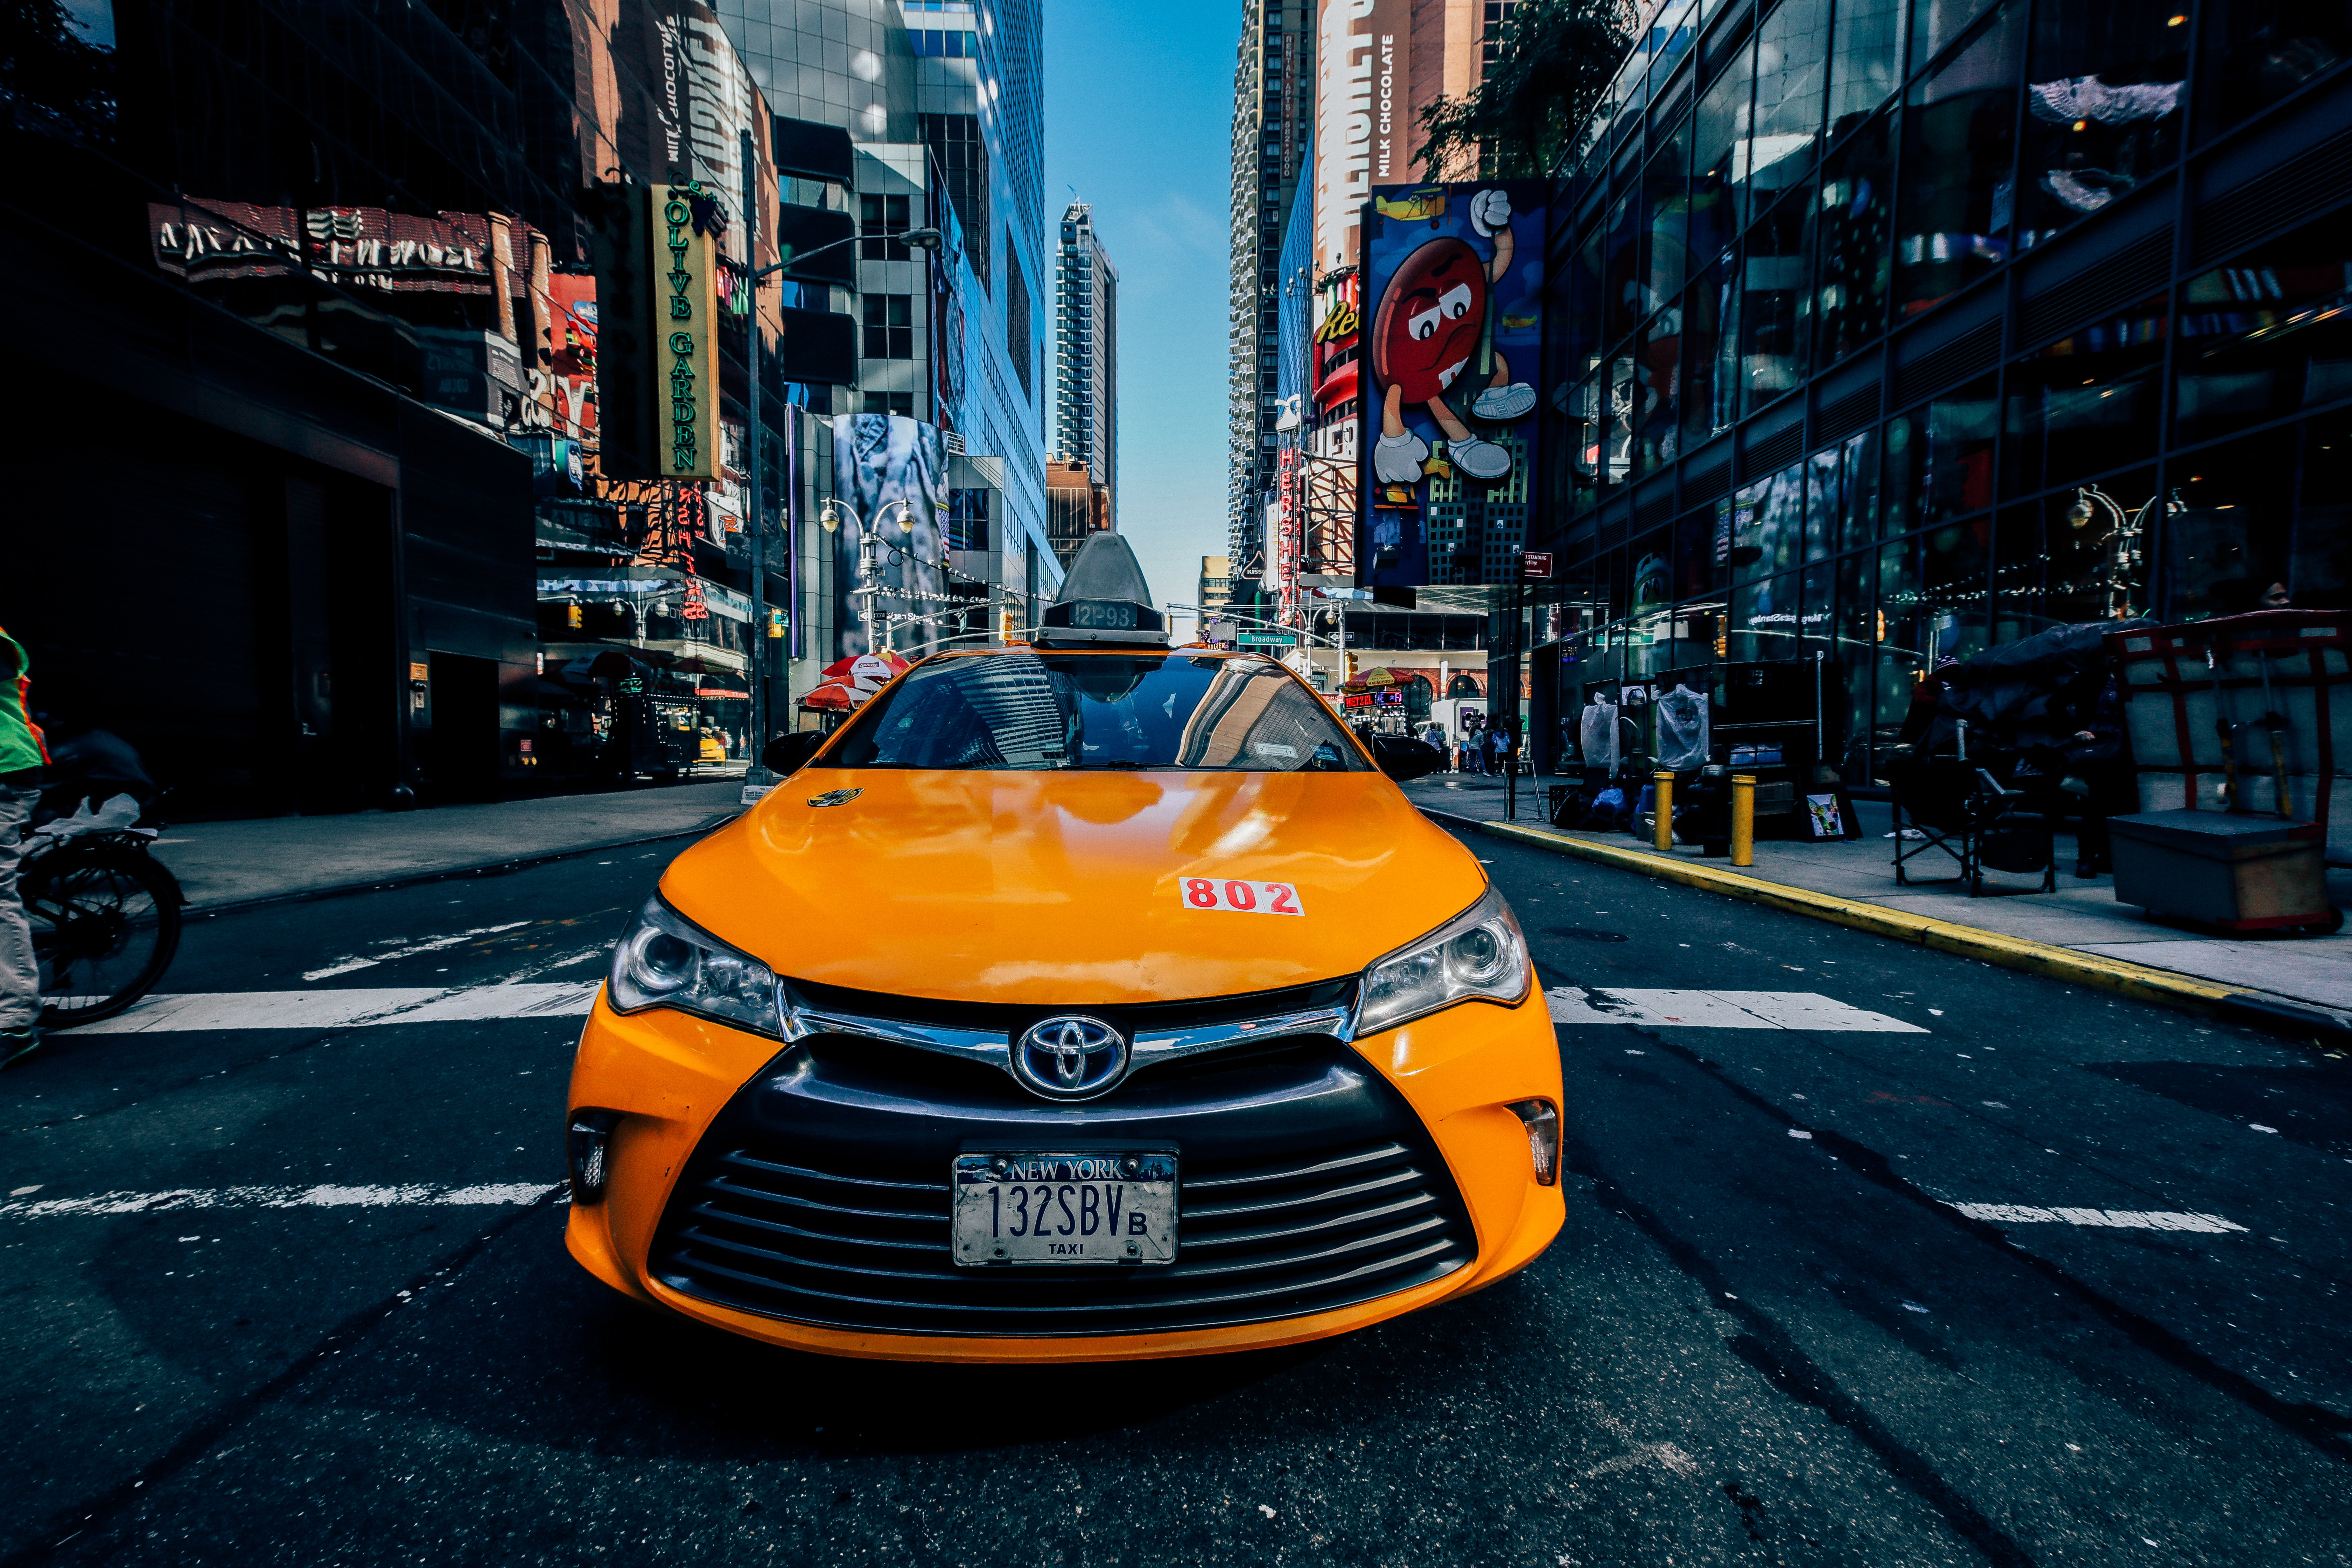

Photo by <a href="https://unsplash.com/@dizzyd718?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Drew Dizzy Graham</a> on <a href="https://unsplash.com/photos/x6QPa_5ZqOc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>


## Overview ##

Automatidata's newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants a way to predict taxi fares using existing data that was collected over the course of a year.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. A model will be built to predict the fare amounts, and a recommendation will be given on taking actionable steps to improve business revenue.

# Build a multiple linear regression model

We will use the PACE strategy workflow to keep track of our work and stay on course from start to finish.

## PACE: **Plan**

### Imports and loading
Import the packages needed for building linear regression models.

In [2]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Package for date conversions for calculating trip durations
import datetime as datetime

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics # confusion matrix
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('done')

done


In [4]:
# Load dataset into dataframe 
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [5]:
# Display the first 10 rows of the data
df0.head(10)

Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
5    23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
6    37660487         2   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
7    69059411         2   08/15/2017 5:41:06 PM   08/15/2017 6:03:05 PM   
8     8433159         2   02/04/2017 4:17:07 PM   02/04/2017 4:29:14 PM   
9    95294817         1   11/10/2017 3:20:29 PM   11/10/2017 3:40:55 PM   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   
5                6           2.30           1                  N   
6                1          12.83           1                  N   
7                1           2.98           1                  N   
8                1           1.20           1                  N   
9                1           1.60           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   
5           161           236             1          9.0    0.5      0.5   
6            79           241             1         47.5    1.0      0.5   
7           237           114             1         16.0    1.0      0.5   
8           234           249             2          9.0    0.0      0.5   
9           239           237             1         13.0    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75  
3        6.39           0.0                    0.3         27.69  
4        0.00           0.0                    0.3         17.80  
5        2.06           0.0                    0.3         12.36  
6        9.86           0.0                    0.3         59.16  
7        1.78           0.0                    0.3         19.58  
8        0.00           0.0                    0.3          9.80  
9        2.75           0.0                    0.3         16.55

## PACE: **Analyze**

### Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [6]:
# Look at the shape and datatypes
df = df0.copy()

print(df.shape)
print('')
df.info()

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

Now, we'll check for missing data and duplicates using.

In [7]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check duplicates
print('Shape of dataframe', df.shape)
print('Shape of dataframe without duplicates', df.drop_duplicates().shape)

# Check total missing data
print('Total count of missing values', df.isna().sum().sum())

# Check missing data per coulmn
print('')
print('Missing data per column')
df.isna().sum()

Shape of dataframe (22699, 18)
Shape of dataframe without duplicates (22699, 18)
Total count of missing values 0

Missing data per column


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
# Get basic statistics on the dataset
df.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

### Convert pickup & dropoff columns to datetime

In [9]:
# Check the format of the data
df['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [10]:
# Convert datetime columns to datetime

# Check data type
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Covert columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Check converted column data types
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

#Dusplay converted data type
df.head(4)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75  
3        6.39           0.0                    0.3         27.69

### Create duration column

Let us create a new column called **duration** that represents the total number of minutes that each taxi ride took.

In [11]:
# Manipulate data tpep_dropoff_datetime and tpep_pickup_datetime into duration column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

### Outliers

Now we need to inspect the columns and chose which ones might have potential outliers.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit the model, we will check the most important columns (columns related to business task) for outliers which will be:
* **trip_distance**
* **fare_amount**
* **duration**



### Box plots

Plot a box plot for each feature mentioned above.

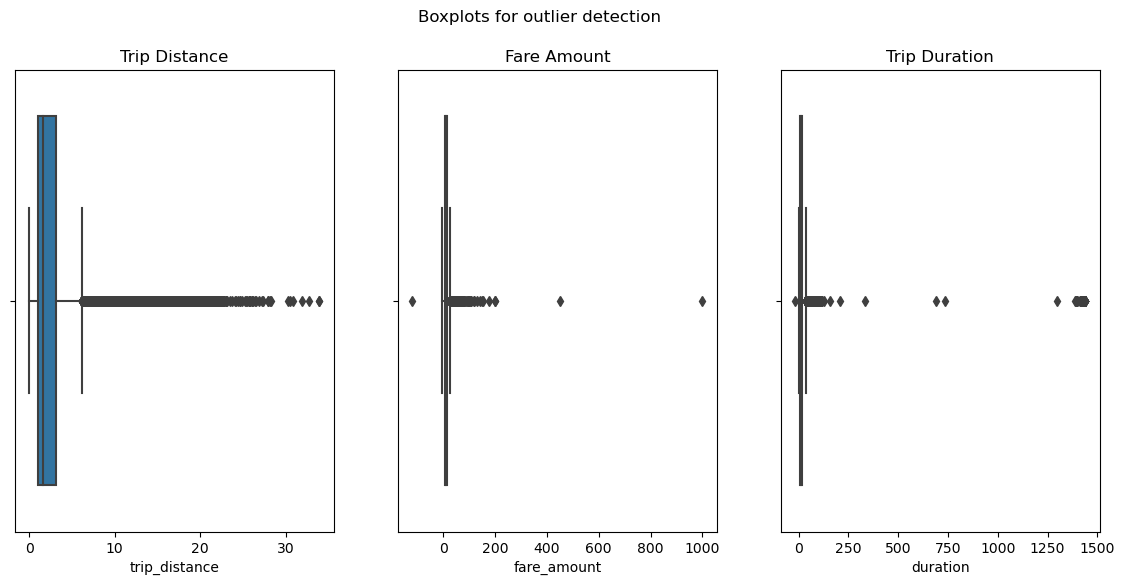

In [13]:
# Set up subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize= (14, 6))

fig.suptitle('Boxplots for outlier detection')

sns.boxplot(data= df, x= 'trip_distance', ax= axes[0])
axes[0].set_title('Trip Distance')

sns.boxplot(data= df, x= 'fare_amount', ax= axes[1])
axes[1].set_title('Fare Amount')

sns.boxplot(data= df, x= 'duration', ax= axes[2])
axes[2].set_title('Trip Duration')

plt.show()

From the looks of our boxplots above, all three contain outliers, some more than others. It's not abnormal for a trip to be 30 miles. For example, it is 30 miles between the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line according to online maps. With this knowledge, it's reasonable to leave these values alone and not alter them. We can look into the values of zero, since they seem abnormal for a ride service distance travelled. 

However, the values for **fare_amount** and **duration** definitely seem to have problematic outliers on the higher end. 

### Imputations

#### trip_distance outliers

We know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, we will sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
print(sorted(set(df['trip_distance']))[:10])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Let us calculate the count of rides where the **trip_distance** is zero.

In [15]:
# Calculate zero distance rides
sum(df['trip_distance'] == 0)

148

#### fare_amount outliers

In [16]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Somehow there are fare amounts less than \\$0 and fare amonuts at \\$999.99. This might be a problem during modeling, so we will impute those values.

In [18]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, ['fare_amount']] = 0

df['fare_amount'].min()

0.0

Now, we will impute the maximum value by using the 75th perencentile or Q3 + (6 * IQR).

In [19]:
def outlier_impute(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [20]:
outlier_impute(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### duration outliers

In [21]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The **duration** column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with 0.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: Q3 + (6 * IQR).

In [22]:
# Impute 0 for any negative values
df.loc[df['duration'] < 0, ['duration']] = 0
df['duration'].min()

0.0

In [23]:
# Impute the high outliers
outlier_impute(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature engineering

#### Create **mean_distance** column

In [24]:
# Create a pickup_dropoff column
df['pickup_dropoff'] = df['PULocationID'].astype('string') + ' ' + df['DOLocationID'].astype('string')
df['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: string

Now, we will group each row by the new **pickup_dropoff** column, compute the mean, and capture the values only in the **trip_distance** column.

In [25]:
# Group the pickup_dropoff rows
grouped = df.groupby(by = 'pickup_dropoff').mean()['trip_distance']
grouped[:5]

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
Name: trip_distance, dtype: float64

In [26]:
# Convert grouped to a dictionary
grouped_dict = grouped.to_dict()

# Ensure variable only contains the inner dictionary
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [27]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map grouped_dict to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

mean_distance
0           3.521667
4909        3.521667
16636       3.521667
18134       3.521667
19761       3.521667
20581       3.521667

#### Create mean_duration column

Now, we need to repeat the process used to create the **mean_distance** column and **mean_duration** column.

In [28]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration = df.groupby(by= 'pickup_dropoff').mean()['duration']

grouped_dur_dict = grouped_duration

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dur_dict)

# Confirm that it worked
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

mean_duration
0          22.847222
4909       22.847222
16636      22.847222
18134      22.847222
19761      22.847222
20581      22.847222

#### Create **day** and **month** columns

Create two new columns, **day** (name of day) and **month** (name of month) 

In [29]:
# Create day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create month column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create rush_hour column

We will define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Then the rush_hour column will contain a binary, 1 if the ride was during rush hour and a 0 if it was not.

In [30]:
# Create rush_hour column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), ['rush_hour']] = 0

In [31]:
# Define rush hour function
def rush_hour_maker(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [32]:
# Apply the rush_hour_maker() function to the new column
df['rush_hour'] = df.apply(rush_hour_maker, axis= 1)

In [33]:
# Check to see if rush hour column is correct
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  tolls_amount  improvement_surcharge  \
0           100           231  ...           0.0                    0.3   
1           186            43  ...           0.0                    0.3   
2           262           236  ...           0.0                    0.3   
3           188            97  ...           0.0                    0.3   
4             4           112  ...           0.0                    0.3   

   total_amount   duration  pickup_dropoff  mean_distance  mean_duration  \
0         16.56  14.066667         100 231       3.521667      22.847222   
1         20.80  26.500000          186 43       3.108889      24.470370   
2          8.75   7.200000         262 236       0.881429       7.250000   
3         27.69  30.250000          188 97       3.700000      30.250000   
4         17.80  16.716667           4 112       4.435000      14.616667   

        day  month rush_hour  
0  saturday    mar         0  
1   tuesday    apr         0  
2    friday    dec         1  
3    sunday    may         0  
4  saturday    apr         0  

[5 rows x 25 columns]

### Scatter plot

Create a scatterplot to visualize the relationship between **mean_duration** and **fare_amount**.

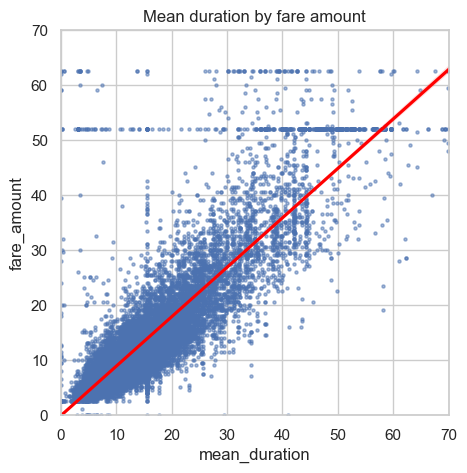

In [34]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration by fare amount')
plt.show()

Well, we can see the **mean_duration** variable correlates with the target variable, which is fairly expected. However, what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

Let us check the value of the rides in the second horizontal line in the scatter plot.

In [35]:
# Check fare amounts greater than $50
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [36]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  2017-04-23 21:34:48   2017-04-23 22:46:23   
569     99259872         2  2017-11-22 21:31:32   2017-11-22 22:00:25   
572     61050418         2  2017-07-18 13:29:06   2017-07-18 13:29:19   
586     54444647         2  2017-06-26 13:39:12   2017-06-26 14:34:54   
692     94424289         2  2017-11-07 22:15:00   2017-11-07 22:45:32   
717    103094220         1  2017-12-06 05:19:50   2017-12-06 05:53:52   
719     66115834         1  2017-08-04 17:53:34   2017-08-04 18:50:56   
782     55934137         2  2017-06-09 09:31:25   2017-06-09 10:24:10   
816     13731926         2  2017-02-21 06:11:03   2017-02-21 06:59:39   
818     52277743         2  2017-06-20 08:15:18   2017-06-20 10:24:37   
835      2684305         2  2017-01-10 22:29:47   2017-01-10 23:06:46   
840     90860814         2  2017-10-27 21:50:00   2017-10-27 22:35:04   
861    106575186         1  2017-12-16 06:39:59   2017-12-16 07:07:59   
881    110495611         2  2017-12-30 05:25:29   2017-12-30 06:01:29   
958     87017503         1  2017-10-15 22:39:12   2017-10-15 23:14:22   
970     12762608         2  2017-02-17 20:39:42   2017-02-17 21:13:29   
984     71264442         1  2017-08-23 18:23:26   2017-08-23 19:18:29   
1082    11006300         2  2017-02-07 17:20:19   2017-02-07 17:34:41   
1097    68882036         2  2017-08-14 23:01:15   2017-08-14 23:03:35   
1110    74720333         1  2017-09-06 10:46:17   2017-09-06 11:44:41   
1179    51937907         2  2017-06-19 06:23:13   2017-06-19 07:03:53   

      passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
11                  2          18.90           2                  N   
110                 1          18.00           2                  N   
161                 1           0.23           2                  N   
247                 1          18.93           2                  N   
379                 1          17.99           2                  N   
388                 1          18.40           2                  N   
406                 1           4.73           2                  N   
449                 2          18.21           2                  N   
468                 1          17.27           2                  N   
520                 6          18.34           2                  N   
569                 1          18.65           2                  N   
572                 1           0.00           2                  N   
586                 1          17.76           2                  N   
692                 2          16.97           2                  N   
717                 1          20.80           2                  N   
719                 1          21.60           2                  N   
782                 2          18.81           2                  N   
816                 5          16.94           2                  N   
818                 1          17.77           2                  N   
835                 1          18.57           2                  N   
840                 1          22.43           2                  N   
861                 2          17.80           2                  N   
881                 6          18.23           2                  N   
958                 1          21.80  

It seems that almost all of the trips in the first 30 rows, in which the fare amount was $52, either begins or ends at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of 5.76 and
5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for 'new york city taxi flat rate '$52'' indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way we know that those data points will always be correct.

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [37]:
# Look at our features in detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [38]:
### YOUR CODE HERE ###
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

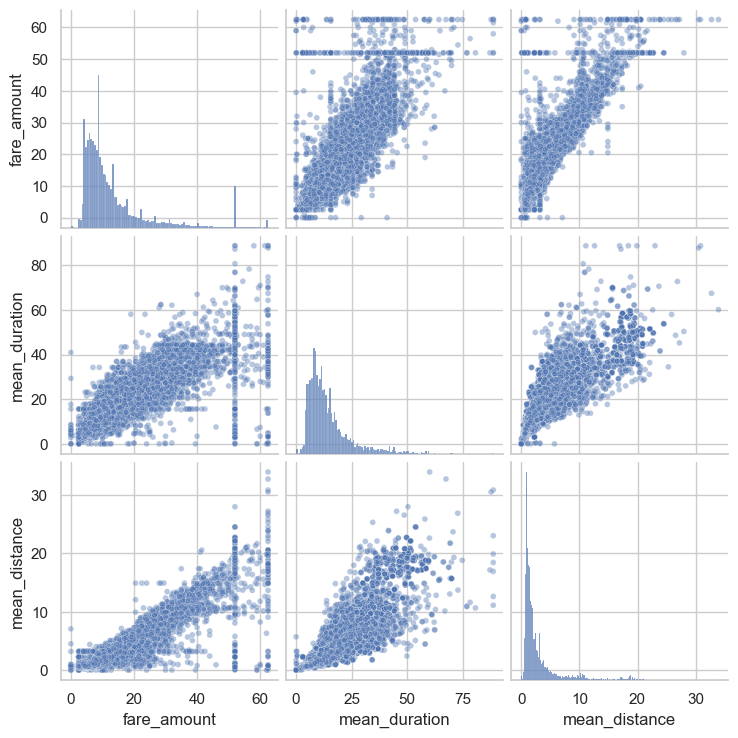

In [39]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
            plot_kws= {'alpha': 0.4, 'size': 5});

These variables all show linear correlation with each other. This finding needs to be investigated further for our model.

### Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [40]:
# Create a correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

VendorID  passenger_count  fare_amount  mean_distance  \
VendorID         1.000000         0.266463     0.001045       0.004741   
passenger_count  0.266463         1.000000     0.014942       0.013428   
fare_amount      0.001045         0.014942     1.000000       0.910185   
mean_distance    0.004741         0.013428     0.910185       1.000000   
mean_duration    0.001876         0.015852     0.859105       0.874864   
rush_hour       -0.002874        -0.022035    -0.020075      -0.039725   

                 mean_duration  rush_hour  
VendorID              0.001876  -0.002874  
passenger_count       0.015852  -0.022035  
fare_amount           0.859105  -0.020075  
mean_distance         0.874864  -0.039725  
mean_duration         1.000000  -0.021583  
rush_hour            -0.021583   1.000000

Visualize a correlation heatmap of the data.

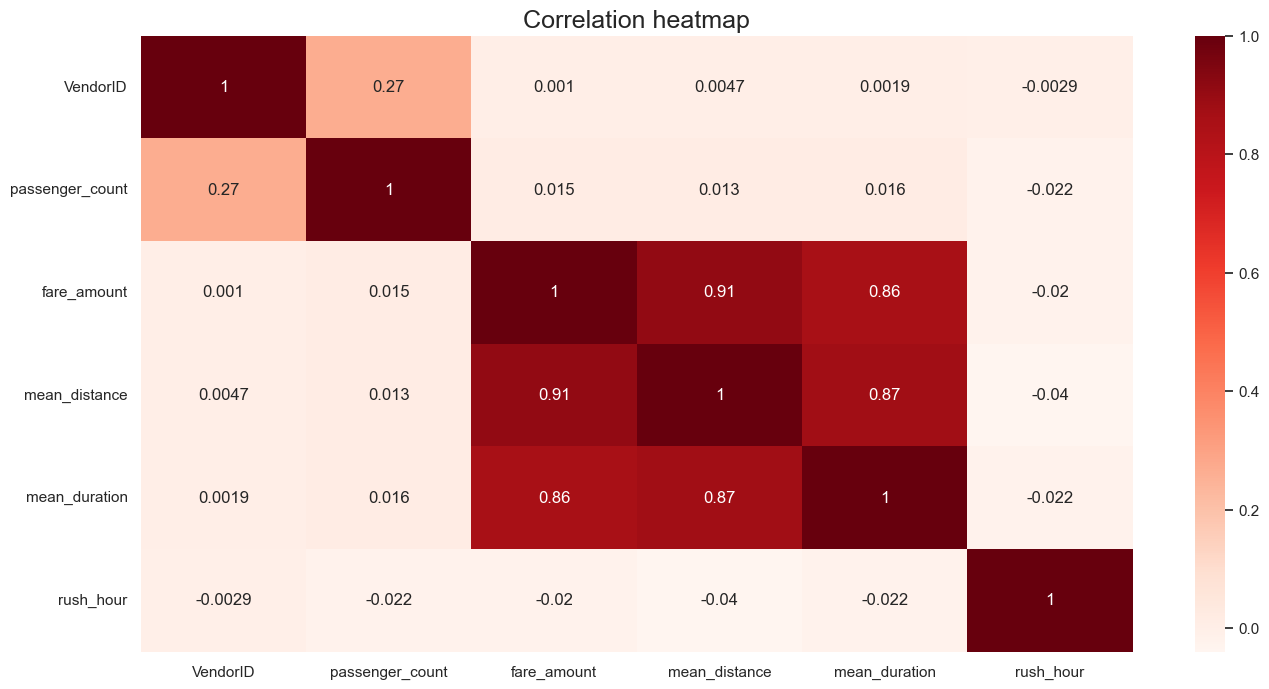

In [41]:
# Create correlation heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

The **mean_duration** and **mean_distance** are both highly correlated with the target variable **fare_amount** They're also both correlated with each other, with a Pearson correlation of 0.87.

Highly correlated predictor variables can be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict **fare_amount**, which will be used as a predictor variable in the machine learning model. Therefore, we will try modeling with both variables even though they are correlated.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### Split data into outcome variable and features

In [42]:
# Check the features and outcome variable
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [43]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      22.847222          0
1         1                1       3.108889      24.470370          0
2         1                1       0.881429       7.250000          1
3         2                1       3.700000      30.250000          0
4         2                1       4.435000      14.616667          0

### Pre-process data


Dummy encode categorical variables

In [44]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype('string')


# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0        2                6       3.521667      22.847222          0
1        1                1       3.108889      24.470370          0
2        1                1       0.881429       7.250000          1
3        2                1       3.700000      30.250000          0
4        2                1       4.435000      14.616667          0

### Normalize the data

In [45]:
# Standardize the X variables
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 0.8931955   3.39065627  0.17093801  0.83195364 -0.64959666]
 [-1.11957573 -0.4997803   0.05495383  0.99296921 -0.64959666]
 [-1.11957573 -0.4997803  -0.57092814 -0.7152838   1.53941679]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -0.77886169 -0.64959666]
 [ 0.8931955  -0.4997803  -0.23485053  0.21719198 -0.64959666]
 [-1.11957573 -0.4997803  -0.40359028 -0.50145366 -0.64959666]]


### Split data into training and test sets

Create training and testing sets.

In [46]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

Instantiate the model and fit it to the training data.

In [47]:
# Fit your model to the training data
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate model

#### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [48]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


#### Test data

Calculate the same metrics on the test data.

In [49]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)

y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593872
MSE: 14.326454156998947
RMSE: 3.7850302716093234


## PACE: **Execute**

In [50]:
# Check y_test variable
y_test

fare_amount
5818          14.0
18134         28.0
4655           5.5
7378          15.5
13914          9.5
...            ...
11108         21.5
7840           5.5
8              9.0
16996          7.0
19601          8.5

[4540 rows x 1 columns]

### Results

Now, we will get the *actual*, *predicted*, and *residual* for the testing set, and store them as columns in a ***results*** dataframe.

In [51]:
# Create a results dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted   residual
5818     14.0  12.356503   1.643497
18134    28.0  16.314595  11.685405
4655      5.5   6.726789  -1.226789
7378     15.5  16.227206  -0.727206
13914     9.5  10.536408  -1.036408

### Visualize model results

Create a scatterplot to visualize **actual** vs. **predicted**.

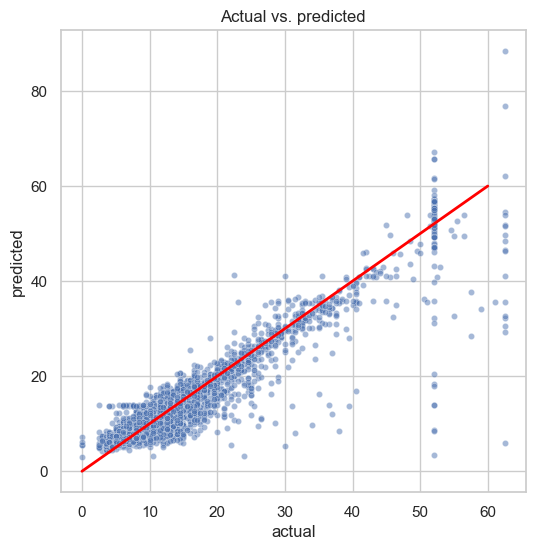

In [52]:
# Create a scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the **residuals** using a histogram.

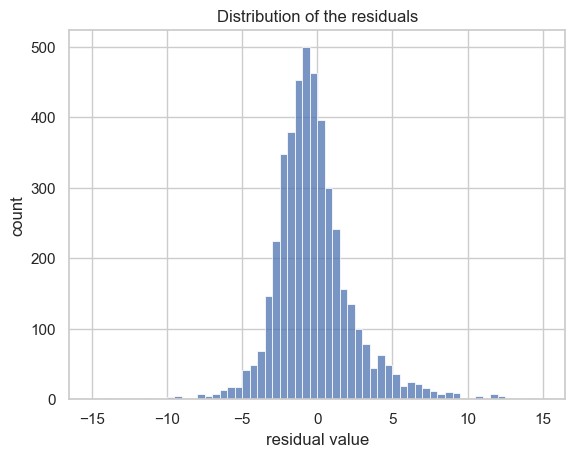

In [53]:
# Visualize the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [54]:
# Calculate residual mean
results['residual'].mean()

-0.015442621528681163

Create a scatterplot of **residuals** over **predicted**.

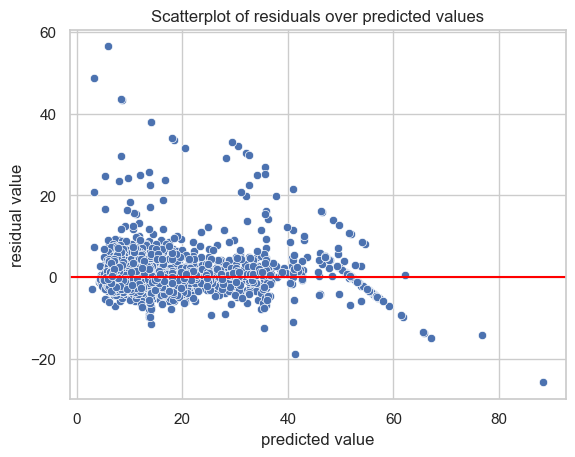

In [55]:
# Create a scatterplot of residuals over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Coefficients

Now, let us get the model's coefficients. The coefficients are returned in the order of the features that were used to train the multiple regression model. 

Which feature had the greatest effect on trip fare?

In [58]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
print(coefficients)

   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0 -0.054376         0.030755       7.102335       2.806779   0.110278


The coefficients reveal that **mean_distance** was the feature with the greatest weight in the model's final prediction. Since we used *StandardScaler*, we cannot say that for every mile traveled the fare increases. An accurate interpretation is that for every positive 1 increase in standard deviation, the fare amount increases by a mean of $7. However, because some highly correlated features were not removed, the confidence interval of this assessment is wider.

To translate this finding back into miles, (i.e. unscale the data), we will do the following.

In [57]:
# Calculate Standard deviation of mean_distance in X_train data
print(X['mean_distance'].std())

# Divide the model coefficient by the standard deviation
print(7.102335 / X['mean_distance'].std())

3.5589927383264626
1.995602554485603


### Conclusion and Recommendation

**Conclusion**

Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model.

**Recommendation**

Now, with thw above findings we can say that for every 3.56 miles traveled, the fare increased by a mean of \\$7.10. If miles are reduced, we can say that for every 1 mile traveled, the fare increased by a mean of \\$2.00. So, it is advisable to calculate the fare amount by mileage to the proposed amounts before the ride begins.